In [8]:
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import math
import os
from collections import defaultdict
from matplotlib.patches import Rectangle
from matplotlib.patches import Rectangle
import numpy as np
import pylab as P


In [51]:
def compute_ripley(path):
    regex = re.compile(r"(\d+):\s+(\d+\.\d+):(\d+)")
    collapsed_count_lst_dct = defaultdict(list)
    random_count_lst_dct = defaultdict(list)

    ripleys = [ripley for ripley in os.listdir(path) if 'collapsed' not in ripley]

    for ripley in ripleys:
        with open(os.path.join(path, ripley)) as f:
            print(ripley)
            for line in f:
                line = line.rstrip('\n')
                r = re.search(regex, line)
                if r is not None:
                    random_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
                else:
                    print(line)
    with open(os.path.join(path, 'ripley_collapsed.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                collapsed_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
    #print(random_count_lst_dct)
    random_count_arr = []
    for k in random_count_lst_dct.keys():
        random_count_arr.append(random_count_lst_dct[k])
    random_count_arr = np.asarray(random_count_arr)
    print(random_count_arr.shape)
    collapsed_count_arr = []
    for k in collapsed_count_lst_dct.keys():
        collapsed_count_arr.append(collapsed_count_lst_dct[k])
    collapsed_count_arr = np.asarray(collapsed_count_arr)
    print(collapsed_count_arr.shape)
    k = np.mean(collapsed_count_arr, axis=0)
    low = np.percentile(random_count_arr, 0.025, axis=0)
    high = np.percentile(random_count_arr, 0.975, axis=0)
    return k, low, high

In [34]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_pggan_celebahq, l_pggan_celebahq, h_pggan_celebahq = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_celebahq, l_sgan_celebahq, h_sgan_celebahq = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_ffhq, l_sgan_ffhq, h_sgan_ffhq = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_10m_ffhq/ripley')

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


In [35]:
# for k in random_count_lst_dct.keys():
#     plt.plot(d_lst, random_count_lst_dct[k], 'b^-', label=k[:-4])

# for k in collapsed_count_lst_dct.keys():
#     plt.plot(d_lst, collapsed_count_lst_dct[k], 'rx-', label=k[:-4])

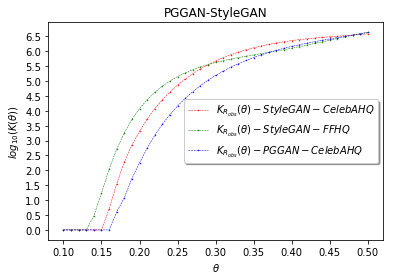

In [72]:
# plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_256, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, k_512, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{512}$')
plt.plot(d_lst, k_sgan_celebahq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-StyleGAN-CelebAHQ$')
plt.plot(d_lst, k_sgan_ffhq, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-StyleGAN-FFHQ$')
plt.plot(d_lst, k_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-PGGAN-CelebAHQ$')
# plt.plot(d_lst, l_ffhq, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_ffhq, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
plt.title("PGGAN-StyleGAN")
plt.savefig('Ripley_PGGAN_SGAN_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

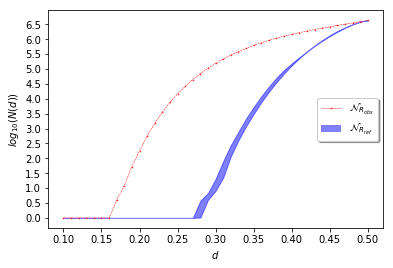

In [112]:
k = P.plot(d_lst, k_pggan_celebahq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
P.fill_between(d_lst, l_pggan_celebahq, h_pggan_celebahq, color='b', alpha=0.5, label="filled_region")
rect = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([k, rect], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("PGGAN-CelebAHQ-1024")
P.savefig('Ripley_PGGAN_CelebAHQ_shaded_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

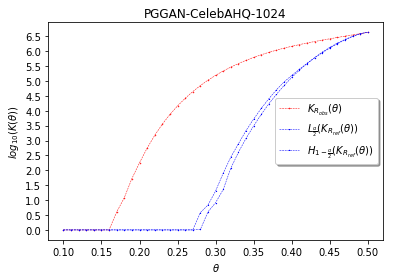

In [68]:
# plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_256, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, k_512, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{512}$')
plt.plot(d_lst, k_pggan_celebahq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')

plt.plot(d_lst, l_pggan_celebahq, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
plt.plot(d_lst, h_pggan_celebahq, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
plt.title("PGGAN-CelebAHQ-1024")
plt.savefig('Ripley_PGGAN_CelebAHQ_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

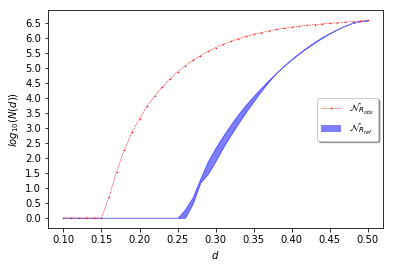

In [115]:
k = P.plot(d_lst, k_sgan_celebahq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
P.fill_between(d_lst, l_sgan_celebahq, h_sgan_celebahq, color='b', alpha=0.5, label="filled_region")
rect = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([k, rect], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-CelebAHQ-1024")
P.savefig('Ripley_StyleGAN_CelebAHQ_shaded_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

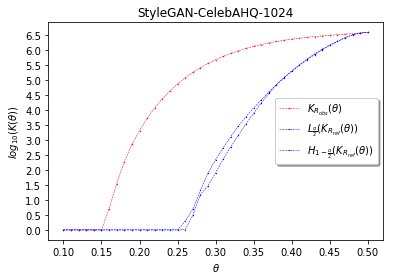

In [38]:
# plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_256, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, k_512, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{512}$')
plt.plot(d_lst, k_sgan_celebahq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')

plt.plot(d_lst, l_sgan_celebahq, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
plt.plot(d_lst, h_sgan_celebahq, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
plt.title("StyleGAN-CelebAHQ-1024")
plt.savefig('Ripley_StyleGAN_CelebAHQ_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

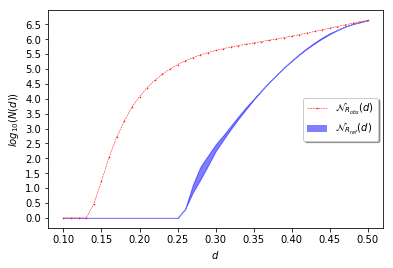

In [145]:
k = P.plot(d_lst, k_sgan_ffhq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
P.fill_between(d_lst, l_sgan_ffhq, h_sgan_ffhq, color='b', alpha=0.5, label="filled_region")
rect = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([k, rect], [r'$\mathcal{N}_{R_{obs}}(d)$', r'$\mathcal{N}_{R_{ref}}(d)$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-FFHQ-1024")
P.savefig('Ripley_StyleGAN_FFHQ_shaded_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

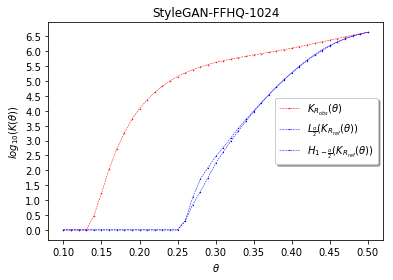

In [39]:
# plt.plot(d_lst, k_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{128}$')
# plt.plot(d_lst, k_256, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{256}$')
# plt.plot(d_lst, k_512, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label='$K_{R_{obs}}(\epsilon)_{512}$')
plt.plot(d_lst, k_sgan_ffhq, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')

plt.plot(d_lst, l_sgan_ffhq, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
plt.plot(d_lst, h_sgan_ffhq, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
plt.title("StyleGAN-FFHQ-1024")
plt.savefig('Ripley_StyleGAN_FFHQ_1024.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(100, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
[(1.0, 0.0, 0.16, 1.0), (1.0, 0.918918918918919, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 0.9239130434782604, 1.0, 1.0), (0.16304347826086973, 0.0, 1.0, 1.0)]


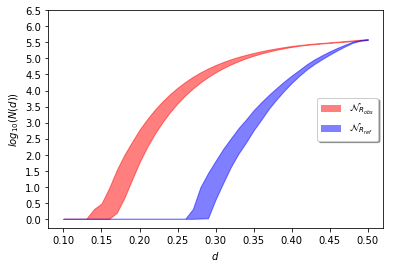

In [121]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_2/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_3/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_4/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_5/ripley')

NUM_COLORS = 5

cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
print(colors)

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5], axis=0), axis=0)

P.fill_between(d_lst, k_sgan_min, k_sgan_max, color='r', alpha=0.5, label="filled_region_obs")
P.fill_between(d_lst, l_sgan, h_sgan, color='b', alpha=0.5, label="filled_region_ref")



rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-Randomness-128")
P.savefig('SGAN_Randomness_128_shaded.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

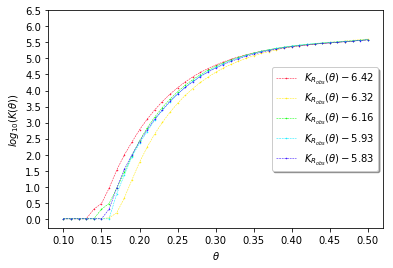

In [42]:
plt.plot(d_lst, k_sgan_5, color=colors[0], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-6.42$')
# plt.plot(d_lst, l_sgan_5, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_5, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_1, color=colors[1], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-6.32$')
# plt.plot(d_lst, l_sgan_1, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_1, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_3, color=colors[2], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-6.16$')
# plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_4, color=colors[3], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-5.93$')
# plt.plot(d_lst, l_sgan_4, color='k', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_4, color='k', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_2, color=colors[4], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-5.83$')
# plt.plot(d_lst, l_sgan_2, color='g', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_2, color='g', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('SGAN_Randomness_128.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


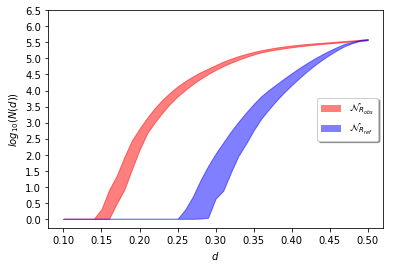

In [122]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5, l_sgan_6, l_sgan_7, l_sgan_8], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5, h_sgan_6, h_sgan_7, h_sgan_8], axis=0), axis=0)

P.fill_between(d_lst, k_sgan_min, k_sgan_max, color='r', alpha=0.5, label="filled_region_obs")
P.fill_between(d_lst, l_sgan, h_sgan, color='b', alpha=0.5, label="filled_region_ref")



rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-Finetune-128")
P.savefig('SGAN_Finetune_128_shaded.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


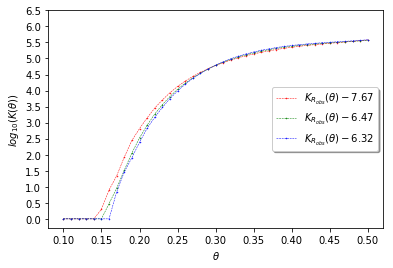

In [99]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

plt.plot(d_lst, k_sgan_1, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-7.67$')
# plt.plot(d_lst, l_sgan_1, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_1, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_2, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-6.47$')
# plt.plot(d_lst, l_sgan_2, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_2, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_3, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-6.32$')
# plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('SGAN_Finetune_128.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

In [ ]:
from 

d_lst = list(pl.frange(0.1,0.5,0.01))

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

k_sgan_512, l_sgan_512, h_sgan_512 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_256, l_sgan_256, h_sgan_256 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_256_1/ripley')
k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_512_1/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_1024_1/ripley')

plt.plot(d_lst, k_sgan_128, color=colors[0], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-128-5.83$')
# plt.plot(d_lst, l_sgan_1, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_1, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_256, color=colors[1], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-256-6.35$')
# plt.plot(d_lst, l_sgan_2, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_2, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_512, color=colors[2], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-512-6.58$')
# plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_1024, color=colors[3], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-1024-5.06$')
# plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('SGAN_Architecture_128.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(100, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


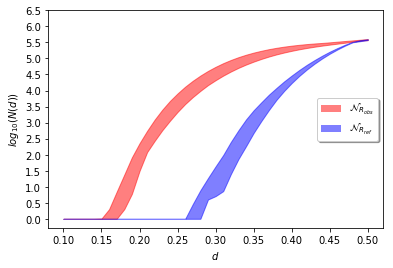

In [125]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_256, l_sgan_256, h_sgan_256 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_256_1/ripley')
k_sgan_512, l_sgan_512, h_sgan_512 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_512_1/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_1024_1/ripley')

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_256, l_sgan_512, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_256, h_sgan_512, h_sgan_1024], axis=0), axis=0)

P.fill_between(d_lst, k_sgan_min, k_sgan_max, color='r', alpha=0.5, label="filled_region_obs")
P.fill_between(d_lst, l_sgan, h_sgan, color='b', alpha=0.5, label="filled_region_ref")



rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-Finetune-128")
P.savefig('SGAN_Architecture_shaded.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


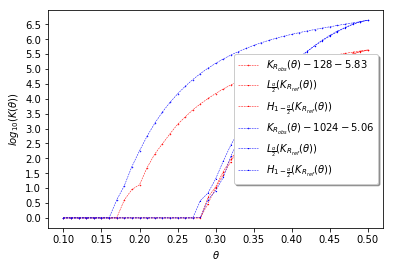

In [11]:
d_lst = list(pl.frange(0.1,0.5,0.01))

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_1m_celebahq/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_10m_celebahq/ripley')

plt.plot(d_lst, k_sgan_128, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-128-5.83$')
plt.plot(d_lst, l_sgan_128, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
plt.plot(d_lst, h_sgan_128, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

#plt.plot(d_lst, k_sgan_256, color=colors[1], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-256-6.35$')
# plt.plot(d_lst, l_sgan_2, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_2, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

#plt.plot(d_lst, k_sgan_512, color=colors[2], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-512-6.58$')
# plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.plot(d_lst, k_sgan_1024, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-1024-5.06$')
plt.plot(d_lst, l_sgan_1024, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
plt.plot(d_lst, h_sgan_1024, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='center right', shadow=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$log_{10}(K(\theta))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('PGGAN_Architecture_128.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


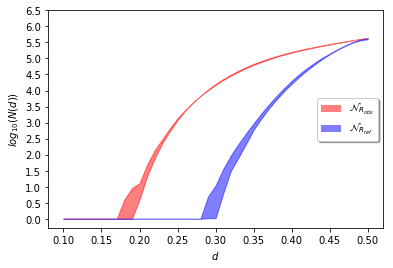

In [128]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_1m_128/ripley')
# k_sgan_256, l_sgan_256, h_sgan_256 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_1m_256_1/ripley')
# k_sgan_512, l_sgan_512, h_sgan_512 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_1m_512_1/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/progressive_growing_of_gans/sampling/monte_carlo_sampling_1m_1024/ripley')

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_1024], axis=0), axis=0)

P.fill_between(d_lst, k_sgan_min, k_sgan_max, color='r', alpha=0.5, label="filled_region_obs")
P.fill_between(d_lst, l_sgan, h_sgan, color='b', alpha=0.5, label="filled_region_ref")



rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

P.yticks(np.arange(0, 7, 0.5))
P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True)
P.xlabel(r'$d$')
P.ylabel(r'$log_{10}(N(d))$')
#P.title("StyleGAN-Finetune-128")
P.savefig('PGGAN_Architecture_shaded.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

P.show()

/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: numpy.arange
  """Entry point for launching an IPython kernel.


ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


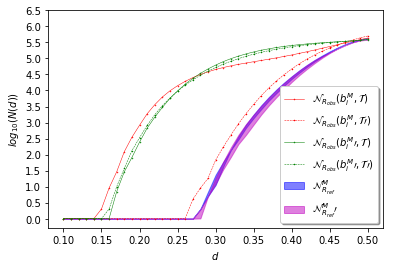

In [134]:
d_lst = list(pl.frange(0.1,0.5,0.01))

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

k_hinge_hinge, l_hinge_hinge, h_hinge_hinge = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan_adversarial_finetuning/sampling/monte_carlo_sampling_1m_hinge_finetune/ripley_monte_carlo_sampling_1m_hinge_finetune')
k_hinge_original, l_hinge_original, h_hinge_original = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan_adversarial_finetuning/sampling/monte_carlo_sampling_1m_hinge_finetune/ripley_monte_carlo_sampling_1m_original')
k_original_hinge, l_original_hinge, h_original_hinge = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan_adversarial_finetuning/sampling/monte_carlo_sampling_1m_original/ripley_monte_carlo_sampling_1m_hinge_finetune')
k_original_original, l_original_original, h_original_original = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan_adversarial_finetuning/sampling/monte_carlo_sampling_1m_original/ripley_monte_carlo_sampling_1m_original')

k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')



#plt.plot(d_lst, k_hinge_original, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-hinge-original$')
#plt.plot(d_lst, k_original_hinge, color='r' marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T}\prime)$')
#plt.plot(d_lst, k_original_original, color='k', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-original-original$')
P.plot(d_lst, k_hinge_hinge, color='r', marker='o', linestyle='solid', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
P.plot(d_lst, k_original_hinge, color='r', marker='s', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T}\prime)$')

P.plot(d_lst, k_sgan_3, color='g', marker='o', linestyle='solid', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M\prime, \mathcal{T})$')
P.plot(d_lst, k_sgan_7, color='g', marker='s', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M\prime, \mathcal{T}\prime)$')


P.fill_between(d_lst, l_hinge_hinge, h_hinge_hinge, color='b', alpha=0.5, label=r'$\mathcal{N}_{R_{ref}}^M$')
P.fill_between(d_lst, l_original_original, h_original_original, color='m', alpha=0.5, label=r'$\mathcal{N}_{R_{ref}}^M\prime$')
# plt.plot(d_lst, l_sgan_128, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_128, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)
rect_k = Rectangle((0, 0), 1, 1, fc="m", alpha=0.5)
# #plt.plot(d_lst, k_sgan_256, color=colors[1], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-256-6.35$')
# # plt.plot(d_lst, l_sgan_2, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# # plt.plot(d_lst, h_sgan_2, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

# #plt.plot(d_lst, k_sgan_512, color=colors[2], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-512-6.58$')
# # plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# # plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

# plt.plot(d_lst, k_sgan_1024, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-1024-5.06$')
# plt.plot(d_lst, l_sgan_1024, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_1024, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

P.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='lower right', shadow=True)
P.xlabel(r'$d$')
plt.ylabel(r'$log_{10}(N(d))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('Hinge_Loss_finetune.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(100, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


/home/wuzhenyu_sjtu/anaconda3/envs/tensorflow-1.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: numpy.arange


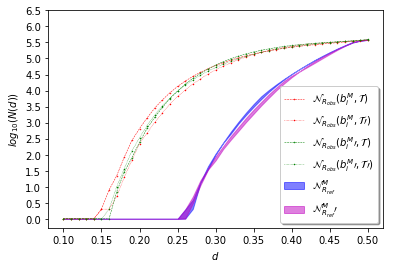

In [144]:
# k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1/ripley')
# k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_2/ripley')
# k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_3/ripley')
# k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_4/ripley')
# k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_5/ripley')

k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

P.plot(d_lst, k_sgan_1, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
# P.plot(d_lst, k_sgan_2, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
# P.plot(d_lst, k_sgan_3, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
# P.plot(d_lst, k_sgan_4, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
P.plot(d_lst, k_sgan_5, color='r', marker='s', linestyle=':', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T}\prime)$')
# P.plot(d_lst, k_sgan_6, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
# P.plot(d_lst, k_sgan_7, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
# P.plot(d_lst, k_sgan_8, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')


d_lst = list(pl.frange(0.1,0.5,0.01))

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

k_hinge_hinge, l_hinge_hinge, h_hinge_hinge = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1/ripley')
k_hinge_original, l_hinge_original, h_hinge_original = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_2/ripley')
k_original_hinge, l_original_hinge, h_original_hinge = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_3/ripley')
k_original_original, l_original_original, h_original_original = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_4/ripley')

k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('/home/wuzhenyu_sjtu/Desktop/stylegan/sampling/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')



#plt.plot(d_lst, k_hinge_original, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-hinge-original$')
#plt.plot(d_lst, k_original_hinge, color='r' marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T}\prime)$')
#plt.plot(d_lst, k_original_original, color='k', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-original-original$')
#P.plot(d_lst, k_hinge_hinge, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T})$')
#P.plot(d_lst, k_original_hinge, color='r', marker='s', linestyle=':', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M, \mathcal{T}\prime)$')

P.plot(d_lst, k_sgan_3, color='g', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M\prime, \mathcal{T})$')
P.plot(d_lst, k_sgan_7, color='g', marker='s', linestyle=':', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}(b_i^M\prime, \mathcal{T}\prime)$')


P.fill_between(d_lst, l_sgan_5, h_sgan_5, color='b', alpha=0.5, label=r'$\mathcal{N}_{R_{ref}}^M$')
P.fill_between(d_lst, l_sgan_7, h_sgan_7, color='m', alpha=0.5, label=r'$\mathcal{N}_{R_{ref}}^M\prime$')
# plt.plot(d_lst, l_sgan_128, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_128, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)
rect_k = Rectangle((0, 0), 1, 1, fc="m", alpha=0.5)
# #plt.plot(d_lst, k_sgan_256, color=colors[1], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-256-6.35$')
# # plt.plot(d_lst, l_sgan_2, color='r', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# # plt.plot(d_lst, h_sgan_2, color='r', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

# #plt.plot(d_lst, k_sgan_512, color=colors[2], marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-512-6.58$')
# # plt.plot(d_lst, l_sgan_3, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# # plt.plot(d_lst, h_sgan_3, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

# plt.plot(d_lst, k_sgan_1024, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)-1024-5.06$')
# plt.plot(d_lst, l_sgan_1024, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')
# plt.plot(d_lst, h_sgan_1024, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(K_{R_{ref}}(\theta))$')

P.yticks(np.arange(0, 7, 0.5))
plt.legend(loc='lower right', shadow=True)
P.xlabel(r'$d$')
plt.ylabel(r'$log_{10}(N(d))$')
#plt.title("StyleGAN-FFHQ-1024")
plt.savefig('Rejection_sampling.pdf', dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()